# Laboratorium 10

## Import zależności

In [46]:
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
import numpy as np 

## Funkcje pomocnicze

In [2]:
def same(first, second, eps):
    return np.all(np.abs(first - second) < eps)

In [158]:
def show_bar_plot(val1, val2, val3, label1, label2, label3, xlabel, ylabel):
    x = np.arange(1)
    width = 0.3

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width - 0.05, [val1], width, label=label1)
    rects1 = ax.bar(x, [val2], width, label=label2)
    rects2 = ax.bar(x + width + 0.05, [val3], width, label=label3)

    ax.set_ylabel(ylabel)
    ax.set_xticks(x)
    ax.set_xlabel(xlabel)
    ax.legend()

    fig.tight_layout()
    plt.show()


In [165]:
def apply_linspace(fun, end=4):
    lin = np.linspace(0, end, end * (2**7))# 100)
    return fun(lin * 2 * np.pi)

In [166]:
def show_sig(sig, end=4, figsize=(10,10), linspace=True):
    lin = np.linspace(0,end,end * (2**7))#100)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot()
    ax.plot(lin * 2 * np.pi, apply_linspace(sig, end) if linspace else sig)
    plt.show()   

## Zadanie 1

### Konstrukcja macierzy Fouriera

In [4]:
def fourier_matrix(n):
    indices = np.arange(n).reshape(-1,1) @ np.arange(n).reshape(1,-1)
    xi = np.exp(np.pi * -2j / n)
    fourier_matrix = np.full((n,n), xi)
    return np.power(fourier_matrix, indices)

### Funkcja realizująca DFT

In [5]:
def dft(vector):
    vector = np.asarray(vector)
    n = vector.shape[0]
    matrix = fourier_matrix(n)
    return matrix @ vector

Przykład działania:

In [6]:
vector = np.random.rand(10)
print(vector)

[0.31370943 0.80853163 0.23756676 0.04618503 0.25078368 0.04105695
 0.00305652 0.63955479 0.73975851 0.22065195]


In [7]:
vector_dft = dft(vector)
print(vector_dft)

[ 3.30085525+0.00000000e+00j  0.9900233 +5.50783545e-01j
 -0.59420539-3.77097367e-01j -0.20283938-1.43866422e+00j
 -0.16930629-1.13221202e-01j -0.21110546-4.52911783e-19j
 -0.16930629+1.13221202e-01j -0.20283938+1.43866422e+00j
 -0.59420539+3.77097367e-01j  0.9900233 -5.50783545e-01j]


Czas działania:

In [8]:
vector_test_time1 = np.random.rand(2 ** 7)

In [9]:
%%timeit -n 3 -r 4 -o 
dft(vector_test_time1)

13.2 ms ± 3.07 ms per loop (mean ± std. dev. of 4 runs, 3 loops each)


<TimeitResult : 13.2 ms ± 3.07 ms per loop (mean ± std. dev. of 4 runs, 3 loops each)>

In [10]:
res = _
dft_time1 = res.best

In [11]:
vector_test_time2 = np.random.rand(2 ** 10)

In [12]:
%%timeit -n 3 -r 4 -o 
dft(vector_test_time2)

349 ms ± 17.8 ms per loop (mean ± std. dev. of 4 runs, 3 loops each)


<TimeitResult : 349 ms ± 17.8 ms per loop (mean ± std. dev. of 4 runs, 3 loops each)>

In [13]:
res = _
dft_time2 = res.best

In [14]:
vector_test_time3 = np.random.rand(2 ** 13)

In [15]:
%%timeit -n 1 -r 1 -o 
dft(vector_test_time3)

21.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 21.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [16]:
res = _
dft_time3 = res.best

### Funkcja realizująca IDFT

In [17]:
def idft(vector):
    vector = np.asarray(vector)
    n = vector.shape[0]
    matrix = fourier_matrix(n)
    return np.conj(matrix @ np.conj(vector)) / n

Przykład działania:

In [18]:
idft(vector_dft)

array([0.31370943-4.16333634e-16j, 0.80853163-1.88737914e-16j,
       0.23756676-1.99840144e-16j, 0.04618503-4.44089210e-17j,
       0.25078368+5.55111512e-17j, 0.04105695+2.44249065e-16j,
       0.00305652+9.54791801e-16j, 0.63955479+1.02140518e-15j,
       0.73975851-2.44249065e-16j, 0.22065195-7.93809463e-16j])

Czas działania:

In [19]:
vector_dft = dft(np.random.rand(10 ** 3))

In [20]:
%%timeit -n 3 -r 4
dft(vector_dft)

354 ms ± 10.5 ms per loop (mean ± std. dev. of 4 runs, 3 loops each)


### Test działania implementacji

In [21]:
def test(function, vector, eps=10 ** -7):
    y = function(vector)
    x = idft(y)
    print('Czy po odwróceniu otrzymujemy tą samą macierz:', same(x, vector, eps))
    
    y_lib = np.fft.fft(vector)
    print('Czy biblioteczna implementacja dft zwraca ten sam wynik:', same(y, y_lib, eps))
    
    x_lib = np.fft.ifft(y_lib)
    print('Czy biblioteczna implementacja idft zwraca ten sam wynik:', same(x, x_lib, eps))

Test działania dft

In [22]:
test(dft, np.random.rand(1))

Czy po odwróceniu otrzymujemy tą samą macierz: True
Czy biblioteczna implementacja dft zwraca ten sam wynik: True
Czy biblioteczna implementacja idft zwraca ten sam wynik: True


In [23]:
test(dft, np.random.rand(8))

Czy po odwróceniu otrzymujemy tą samą macierz: True
Czy biblioteczna implementacja dft zwraca ten sam wynik: True
Czy biblioteczna implementacja idft zwraca ten sam wynik: True


In [24]:
test(dft, np.random.rand(2 ** 7))

Czy po odwróceniu otrzymujemy tą samą macierz: True
Czy biblioteczna implementacja dft zwraca ten sam wynik: True
Czy biblioteczna implementacja idft zwraca ten sam wynik: True


In [25]:
test(dft, np.random.rand(2 ** 10))

Czy po odwróceniu otrzymujemy tą samą macierz: True
Czy biblioteczna implementacja dft zwraca ten sam wynik: True
Czy biblioteczna implementacja idft zwraca ten sam wynik: True


### Szybka transformata Fouriera - FFT

In [163]:
def fft(vector):
    vector = np.asarray(vector)
    n = vector.shape[0]
    if n == 1:
        return vector
    
    even_idx = fft(vector[::2])
    odd_idx = fft(vector[1::2])
    
    multiplier = np.exp(np.pi * np.arange(n) * -2j / n)
    res = np.concatenate([even_idx + multiplier[:n // 2] * odd_idx,even_idx + multiplier[n // 2:] * odd_idx])
    return res

Test działania:

In [157]:
test(fft, np.random.rand(1))

Czy po odwróceniu otrzymujemy tą samą macierz: True
Czy biblioteczna implementacja dft zwraca ten sam wynik: True
Czy biblioteczna implementacja idft zwraca ten sam wynik: True


In [151]:
test(fft, np.random.rand(8))

Czy po odwróceniu otrzymujemy tą samą macierz: True
Czy biblioteczna implementacja dft zwraca ten sam wynik: True
Czy biblioteczna implementacja idft zwraca ten sam wynik: True


In [152]:
test(fft, np.random.rand(2 ** 7))

Czy po odwróceniu otrzymujemy tą samą macierz: True
Czy biblioteczna implementacja dft zwraca ten sam wynik: True
Czy biblioteczna implementacja idft zwraca ten sam wynik: True


In [153]:
test(fft, np.random.rand(2 ** 10))

Czy po odwróceniu otrzymujemy tą samą macierz: True
Czy biblioteczna implementacja dft zwraca ten sam wynik: True
Czy biblioteczna implementacja idft zwraca ten sam wynik: True


Czas działania:

In [31]:
%%timeit -n 3 -r 4 -o 
fft(vector_test_time1)

4.34 ms ± 79.1 µs per loop (mean ± std. dev. of 4 runs, 3 loops each)


<TimeitResult : 4.34 ms ± 79.1 µs per loop (mean ± std. dev. of 4 runs, 3 loops each)>

In [32]:
res = _
fft_time1 = res.best

In [33]:
%%timeit -n 3 -r 4 -o 
fft(vector_test_time2)

17.7 ms ± 5.2 ms per loop (mean ± std. dev. of 4 runs, 3 loops each)


<TimeitResult : 17.7 ms ± 5.2 ms per loop (mean ± std. dev. of 4 runs, 3 loops each)>

In [34]:
res = _
fft_time2 = res.best

In [35]:
%%timeit -n 1 -r 1 -o 
fft(vector_test_time3)

127 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 127 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [36]:
res = _
fft_time3 = res.best

### Porównanie czasu działania implementacji

Czas działania implementacji bibliotecznej:

In [37]:
%%timeit -n 3 -r 4 -o 
np.fft.fft(vector_test_time1)

The slowest run took 11.10 times longer than the fastest. This could mean that an intermediate result is being cached.
45.8 µs ± 39.5 µs per loop (mean ± std. dev. of 4 runs, 3 loops each)


<TimeitResult : 45.8 µs ± 39.5 µs per loop (mean ± std. dev. of 4 runs, 3 loops each)>

In [38]:
res = _
lib_time1 = res.best

In [39]:
%%timeit -n 3 -r 4 -o 
np.fft.fft(vector_test_time2)

65.4 µs ± 20.1 µs per loop (mean ± std. dev. of 4 runs, 3 loops each)


<TimeitResult : 65.4 µs ± 20.1 µs per loop (mean ± std. dev. of 4 runs, 3 loops each)>

In [40]:
res = _
lib_time2 = res.best

In [41]:
%%timeit -n 1 -r 1 -o 
np.fft.fft(vector_test_time3)

363 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 363 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [42]:
res = _
lib_time3 = res.best

Porównanie

In [60]:
md('''
| Implementacja | n = 2 ^ 7  | n = 2 ^ 10 | n = 2 ^ 13 |
|---------------|------------|------------|------------|
|   DFT         | %f s       | %f s       | %f s       |
|   FFT         | %f s       | %f s       | %f s       |
|   Numpy FFT   | %f s       | %f s       | %f s       |
''' % (
    dft_time1, dft_time2, dft_time3,
    fft_time1, fft_time2, fft_time3,
    lib_time1, lib_time2, lib_time3
))


| Implementacja | n = 2 ^ 7  | n = 2 ^ 10 | n = 2 ^ 13 |
|---------------|------------|------------|------------|
|   DFT         | 0.010061 s       | 0.333320 s       | 21.905411 s       |
|   FFT         | 0.004268 s       | 0.014442 s       | 0.126985 s       |
|   Numpy FFT   | 0.000010 s       | 0.000033 s       | 0.000363 s       |


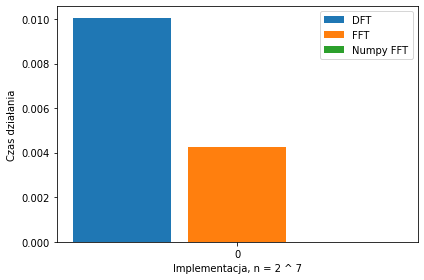

In [43]:
show_bar_plot(dft_time1, fft_time1, lib_time1, 'DFT', 'FFT', 'Numpy FFT', 'Implementacja, n = 2 ^ 7', 'Czas działania')

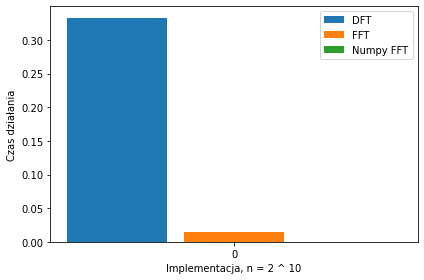

In [44]:
show_bar_plot(dft_time2, fft_time2, lib_time2, 'DFT', 'FFT', 'Numpy FFT', 'Implementacja, n = 2 ^ 10', 'Czas działania')

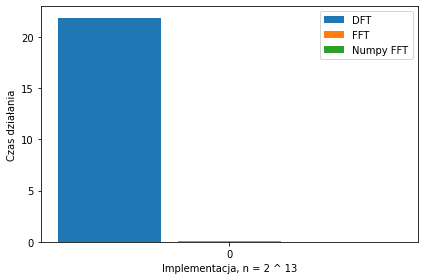

In [45]:
show_bar_plot(dft_time3, fft_time3, lib_time3, 'DFT', 'FFT', 'Numpy FFT', 'Implementacja, n = 2 ^ 13', 'Czas działania')

Nie jest zaskoczeniem dla mnie, że najwyższą wydajnością wykazała się implementacjia biblioteczna. 

Warto zauważyć jednak, że różnica pomiędzy czasem wykonania mojej implementacji DFT, a FFT jest ogromna we wszystkich przypadkach testowych, podczas gdy implementacja FFT nie jest znacząco trudniejsza do przygotowania. 

## Zadanie 2
### Sygnały czasowo - amplitudowe

In [82]:
sin1 = lambda x: np.sin(x)
sin2 = lambda x: np.sin(x * 2)
sin3 = lambda x: np.sin(x * 7)
sin4 = lambda x: np.sin(x * 10)
sin5 = lambda x: np.sin(x * 13)

Sygnał będący sumą pięciu sygnałów sinusoidalnych o różnych częstotliwościach

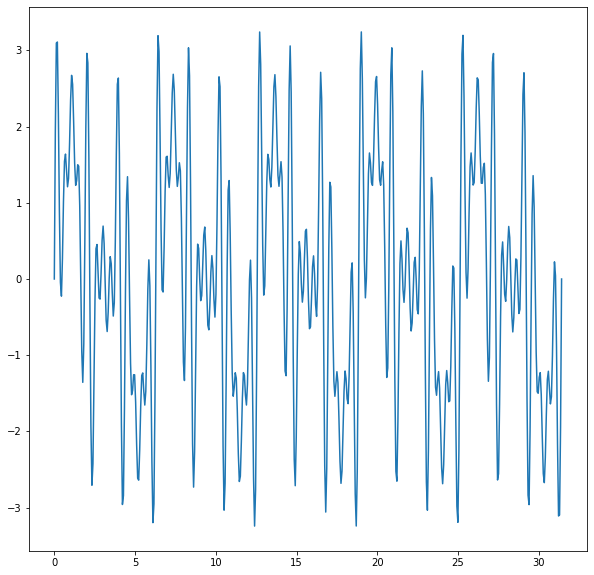

In [104]:
signal1 = lambda x: sin1(x) + sin2(x) + sin3(x) + sin4(x) + sin5(x)

show_sig(signal1)

Sygnał złożony z pięciu (tych samych) sygnałów sinusoidalnych ułożonych przedziałami

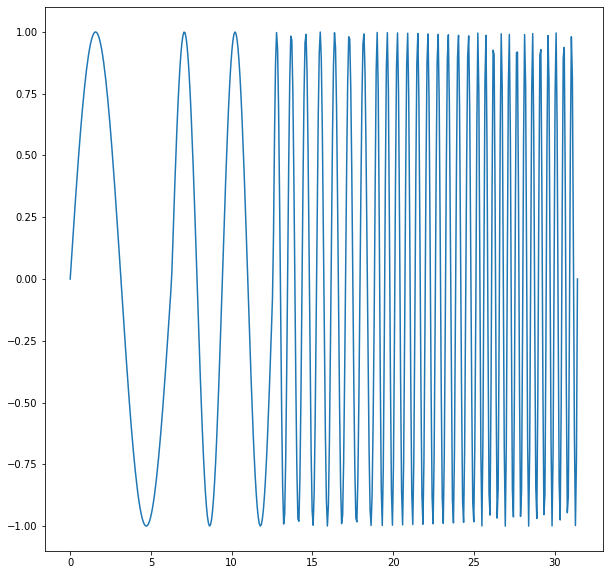

In [119]:
signal2 = lambda x: np.concatenate([
                    sin1(x[: x.shape[0] // 5]),
                    sin2(x[x.shape[0] // 5 : 2 * x.shape[0] // 5]),
                    sin3(x[2 * x.shape[0] // 5 : 3 *x.shape[0] // 5]),
                    sin4(x[3 * x.shape[0] // 5 : 4 * x.shape[0] // 5]),
                    sin5(x[4 * x.shape[0] // 5 :])
                    ])

show_sig(signal2)

### Transformacja sygnałów testowych do domeny częstotliwości 

Sygnał będący sumą pięciu sygnałów sinusoidalnych

In [167]:
fft(apply_linspace(signal1))

n 512
n 256
n 128
n 64
n 32
n 16
n 8
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 8
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 16
n 8
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 8
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 32
n 16
n 8
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 8
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 16
n 8
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 8
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 64
n 32
n 16
n 8
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 8
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 16
n 8
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 8
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 32
n 16
n 8
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 8
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 16
n 8
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 4
n 2
n 1
n 1
n 2
n 1
n 1
n 8
n 4
n 2


array([ 8.09352585e-14+0.00000000e+00j,  2.88995074e-03-4.70982834e-01j,
        1.33433155e-02-1.08725658e+00j,  4.36922503e-02-2.37330847e+00j,
        6.29986553e+00-2.56628071e+02j, -2.52041483e-02+8.21269743e-01j,
        3.60712642e-02-9.79340980e-01j,  1.45891778e-01-3.39457717e+00j,
        1.25436807e+01-2.55332486e+02j, -2.26485964e-01+4.09710486e+00j,
       -1.14149001e-01+1.85800419e+00j, -6.81389985e-02+1.00800563e+00j,
       -3.72222738e-02+5.04610054e-01j, -1.10243843e-02+1.37914079e-01j,
        1.41404214e-02-1.64204214e-01j,  4.01171814e-02-4.34640795e-01j,
        6.81470210e-02-6.91908316e-01j,  9.93194734e-02-9.48694577e-01j,
        1.34813893e-01-1.21565764e+00j,  1.76105513e-01-1.50371526e+00j,
        2.25232066e-01-1.82613335e+00j,  2.85236268e-01-2.20136768e+00j,
        3.61014285e-01-2.65810762e+00j,  4.61146045e-01-3.24589182e+00j,
        6.02408389e-01-4.06110748e+00j,  8.23118083e-01-5.32374123e+00j,
        1.23537318e+00-7.67782919e+00j,  2.37428808

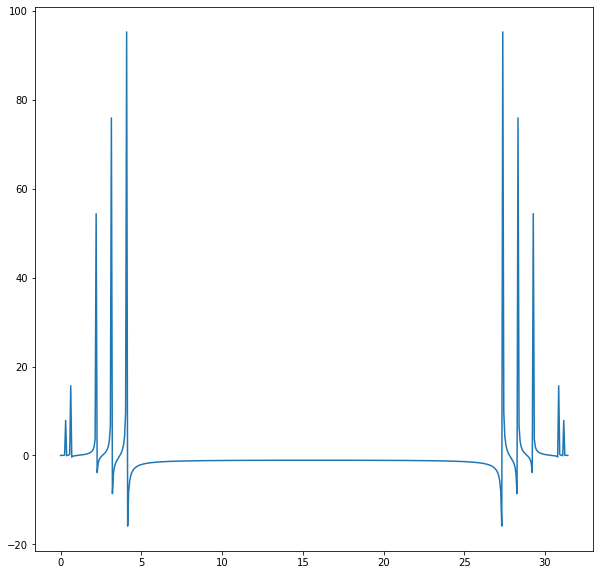

In [154]:
show_sig(np.real(np.fft.fft(apply_linspace(signal1))), linspace=False)

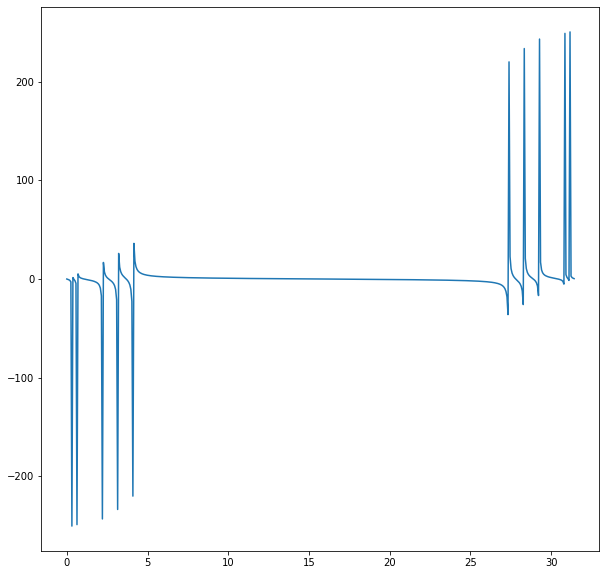

In [145]:
show_sig(np.imag(np.fft.fft(apply_linspace(signal1))), linspace=False)

Sygnał będący sumą interwałów 

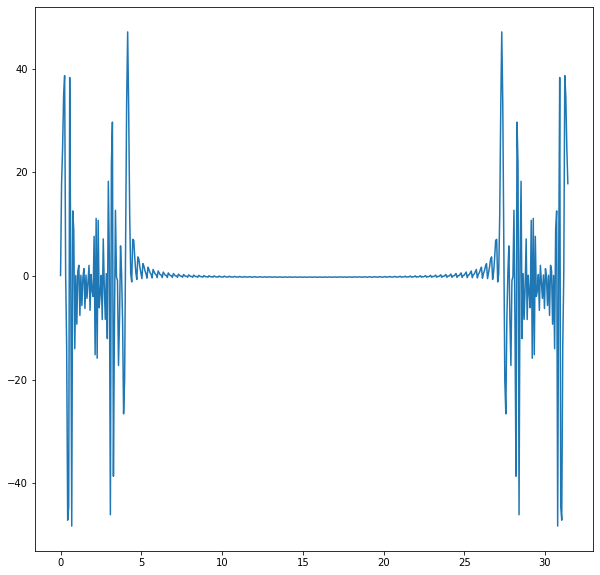

In [142]:
show_sig(np.real(np.fft.fft(apply_linspace(signal2))), linspace=False)

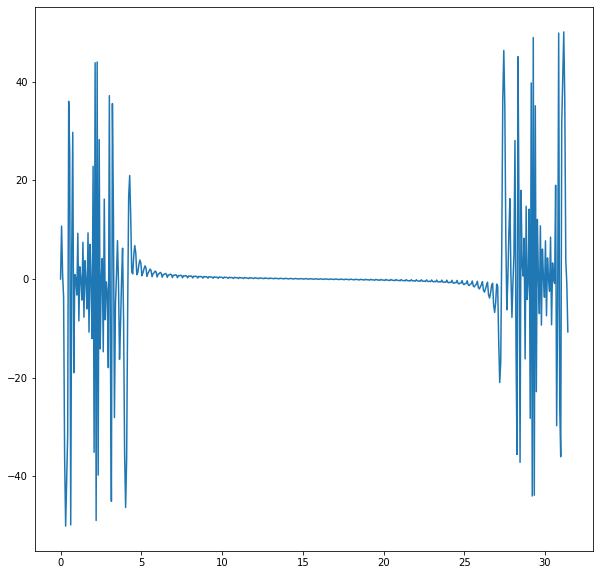

In [146]:
show_sig(np.imag(np.fft.fft(apply_linspace(signal2))), linspace=False)